In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

from probability import *
from hilbert_transform import *
from example_measures import lmbda_1, lmbda_2, lmbda_3, lmbda_4
from spectral_transforms import B_real

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsfonts}" + "\n" + r"\usepackage{amsmath}" + "\n" + r"\usepackage{amssymb}"
})

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


### Example 1: Map $\mathcal{B}$ takes discrete distribution $\lambda$ to discrete distribution $\mu$ when $c_0$ is real

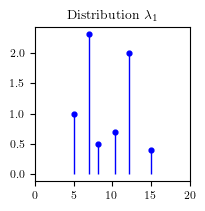

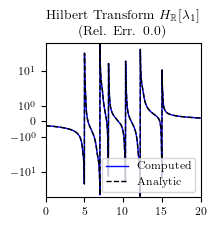

left and right roots found


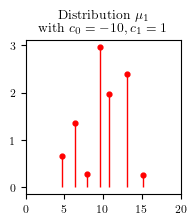

In [2]:
Hlmbda_1 = HilbertTransform(lmbda_1)
Hlmbda_1_analytic = lambda x: 1/(math.pi) * np.sum(lmbda_1.atom_wts / (x[:, None] - lmbda_1.atoms), axis=1)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\lambda_1$")
if lmbda_1.density is not None:
    ax.plot(lmbda_1.quad_pts, lmbda_1.density_vals, color="blue", linewidth=1)
ax.scatter(lmbda_1.atoms, lmbda_1.atom_wts, marker='o', color="blue", s=12)
ax.vlines(lmbda_1.atoms, ymin=0, ymax=lmbda_1.atom_wts, color="blue", linewidth=1)
ax.set_xlim(0, 20)
plt.savefig(f"figures/lmbda1.pdf", bbox_inches='tight')
plt.show()

H_comp = Hlmbda_1(lmbda_1.quad_pts)
H_analytic = Hlmbda_1_analytic(lmbda_1.quad_pts)
rel_err = np.linalg.norm(H_comp - H_analytic) / np.linalg.norm(H_analytic)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Hilbert Transform " + r"$H_{\mathbb{R}}[\lambda_1]$" + f"\n(Rel. Err. {rel_err})")
ax.plot(lmbda_1.quad_pts, H_comp, color="blue", linewidth=1)
ax.plot(lmbda_1.quad_pts, H_analytic, color="k", linestyle='dashed', linewidth=1)
ax.set_xlim(0, 20)
ax.set_yscale("symlog")
ax.legend(["Computed", "Analytic"], fontsize=8)
plt.savefig(f"figures/H_lmbda1.pdf", bbox_inches='tight')
plt.show()

c0 = -10
c1 = 1
mu_1, _, _ = B_real(lmbda_1, c0, c1)
fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("Distribution $\mu_1$\n" + str)
if mu_1.density is not None:
    ax.plot(mu_1.quad_pts, mu_1.density_vals, color="red", linewidth=1)
ax.scatter(mu_1.atoms, mu_1.atom_wts, marker='o', color="red", s=12)
ax.vlines(mu_1.atoms, ymin=0, ymax=mu_1.atom_wts, color="red", linewidth=1)
ax.set_xlim(0, 20)
plt.savefig(f"figures/mu1.pdf", bbox_inches='tight')
plt.show()

### Example 2: Map $\mathcal{B}$ takes continuous distribution $\lambda$ to mixed distribution $\mu$ when $c_0$ is real

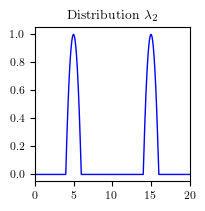

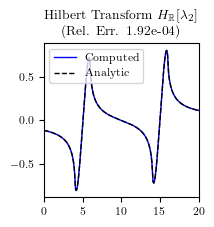

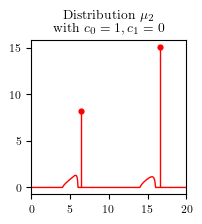

In [2]:
Hlmbda_2 = HilbertTransform(lmbda_2)
a = 1
H_parabolic = lambda x: 1/math.pi * (2*x/a - (1 - (x/a)**2)*np.log(np.abs((x-a)/(x+a))))
Hlmbda_2_analytic = lambda x: H_parabolic(x - 5) + H_parabolic(x - 15)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\lambda_2$")
if lmbda_2.density is not None:
    ax.plot(lmbda_2.quad_pts, lmbda_2.density_vals, color="blue", linewidth=1)
ax.scatter(lmbda_2.atoms, lmbda_2.atom_wts, marker='o', color="blue", s=12)
ax.vlines(lmbda_2.atoms, ymin=0, ymax=lmbda_2.atom_wts, color="blue", linewidth=1)
ax.set_xlim(0, 20)
plt.savefig(f"figures/lmbda2.pdf", bbox_inches='tight')
plt.show()

H_comp = Hlmbda_2(lmbda_2.quad_pts)
H_analytic = Hlmbda_2_analytic(lmbda_2.quad_pts)
rel_err = np.linalg.norm(H_comp - H_analytic) / np.linalg.norm(H_analytic)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Hilbert Transform " + r"$H_{\mathbb{R}}[\lambda_2]$" + f"\n(Rel. Err. {rel_err:.2e})")
ax.plot(lmbda_2.quad_pts, H_comp, color="blue", linewidth=1)
ax.plot(lmbda_2.quad_pts, H_analytic, color="k", linestyle='dashed', linewidth=1)
ax.set_xlim(0, 20)
#ax.set_yscale("symlog")
ax.legend(["Computed", "Analytic"], fontsize=8)
plt.savefig(f"figures/H_lmbda2.pdf", bbox_inches='tight')
plt.show()

c0 = 1
c1 = 0
mu_2, _, _ = B_real(lmbda_2, c0, c1)

# clean up the distribution
keep_atoms = np.abs(mu_2.atom_wts) > 1e-10
mu_2.atoms = mu_2.atoms[keep_atoms]
mu_2.atom_wts = mu_2.atom_wts[keep_atoms]

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("Distribution $\mu_2$\n" + str)
if mu_2.density is not None:
    ax.plot(mu_2.quad_pts, mu_2.density_vals, color="red", linewidth=1)
ax.scatter(mu_2.atoms, mu_2.atom_wts, marker='o', color="red", s=12)
ax.vlines(mu_2.atoms, ymin=0, ymax=mu_2.atom_wts, color="red", linewidth=1)
ax.set_xlim(0, 20)
plt.savefig(f"figures/mu2.pdf", bbox_inches='tight')
plt.show()

### Example 3: Map $\mathcal{B}$ takes mixed globally supported distribution $\lambda$ to continuous distribution $\mu$ when $c_0$ is real

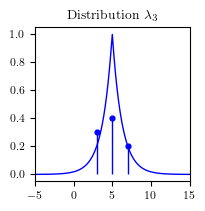

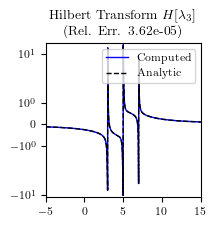

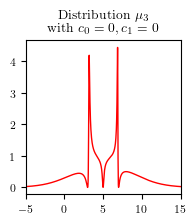

In [2]:
Hlmbda_3 = HilbertTransform(lmbda_3)
a = 0.8
Hlmbda_3_analytic = lambda x: np.sign(x-5)/(math.pi) * (np.exp(-a*np.abs(x-5))*scipy.special.expi(a*np.abs(x-5)) - np.exp(a*np.abs(x-5))*scipy.special.expi(-a*np.abs(x-5))) + 1/(math.pi) * np.sum(lmbda_3.atom_wts / (x[:, None] - lmbda_3.atoms), axis=1)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\lambda_3$")
if lmbda_3.density is not None:
    ax.plot(lmbda_3.quad_pts, lmbda_3.density_vals, color="blue", linewidth=1)
ax.scatter(lmbda_3.atoms, lmbda_3.atom_wts, marker='o', color="blue", s=12)
ax.vlines(lmbda_3.atoms, ymin=0, ymax=lmbda_3.atom_wts, color="blue", linewidth=1)
ax.set_xlim(-5, 15)
plt.savefig(f"figures/lmbda3.pdf", bbox_inches='tight')
plt.show()

H_comp = Hlmbda_3(lmbda_3.quad_pts)
H_analytic = Hlmbda_3_analytic(lmbda_3.quad_pts)
rel_err = np.linalg.norm(H_comp - H_analytic) / np.linalg.norm(H_analytic)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title(f"Hilbert Transform $H[\lambda_3]$\n(Rel. Err. {rel_err:.2e})")
ax.plot(lmbda_3.quad_pts, H_comp, color="blue", linewidth=1)
ax.plot(lmbda_3.quad_pts, H_analytic, color="k", linestyle='dashed', linewidth=1)
ax.set_xlim(-5, 15)
ax.set_yscale("symlog")
ax.legend(["Computed", "Analytic"], fontsize=8)
plt.savefig(f"figures/H_lmbda3.pdf", bbox_inches='tight')
plt.show()

c0 = 0
c1 = 0
mu_3, _, _ = B_real(lmbda_3, c0, c1)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0={c0}, c_1={c1}$"
ax.set_title("Distribution $\mu_3$\n" + str)
if mu_3.density is not None:
    ax.plot(mu_3.quad_pts, mu_3.density_vals, color="red", linewidth=1)
ax.scatter(mu_3.atoms, mu_3.atom_wts, marker='o', color="red", s=12)
ax.vlines(mu_3.atoms, ymin=0, ymax=mu_3.atom_wts, color="red", linewidth=1)
ax.set_xlim(-5, 15)
plt.savefig(f"figures/mu3.pdf", bbox_inches='tight')
plt.show()

### Example 4: Map $\mathcal{B}$ takes mixed distribution $\lambda$ to continuous distribution $\mu$ when $c_0$ is complex

In [ ]:
Hlmbda_4 = HilbertTransform(lmbda_4)
a = 1
H_triangle = lambda x: -1/math.pi*(np.log(np.abs((x-a)/(x+a))) + x/a*np.log(np.abs(x**2/(x**2-a**2))))
Hlmbda_4_analytic = lambda x: H_triangle(x - 5) + H_triangle(x + 5) + 1/(math.pi) * np.sum(lmbda_4.atom_wts / (x[:, None] - lmbda_4.atoms), axis=1)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\lambda_4$")
if lmbda_4.density is not None:
    ax.plot(lmbda_4.quad_pts, lmbda_4.density_vals, color="blue", linewidth=1)
ax.scatter(lmbda_4.atoms, lmbda_4.atom_wts, marker='o', color="blue", s=12)
ax.vlines(lmbda_4.atoms, ymin=0, ymax=lmbda_4.atom_wts, color="blue", linewidth=1)
ax.set_xlim(-10, 10)
plt.savefig(f"figures/lmbda4.pdf", bbox_inches='tight')
plt.show()

H_comp = Hlmbda_4(lmbda_4.quad_pts)
H_analytic = Hlmbda_4_analytic(lmbda_4.quad_pts)
rel_err = np.linalg.norm(H_comp - H_analytic) / np.linalg.norm(H_analytic)

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title(f"Hilbert Transform $H[\lambda_4]$\n(Rel. Err. {rel_err:.2e})")
ax.plot(lmbda_4.quad_pts, H_comp, color="blue", linewidth=1)
ax.plot(lmbda_4.quad_pts, H_analytic, color="k", linestyle='dashed', linewidth=1)
ax.set_xlim(-10, 10)
ax.set_yscale("symlog")
ax.legend(["Computed", "Analytic"], fontsize=8)
plt.savefig(f"figures/H_lmbda4.pdf", bbox_inches='tight')
plt.show()

c0 = 1+1j
c1 = 1
mu_4, _, _ = B_real(lmbda_4, c0, c1)

fig, ax = plt.subplots(figsize=(2, 2))
str = f"with $c_0=1+1i, c_1={c1}$"
ax.set_title("Distribution $\mu_4$\n" + str)
if mu_4.density is not None:
    ax.plot(mu_4.quad_pts, mu_4.density_vals, color="red", linewidth=1)
ax.scatter(mu_4.atoms, mu_4.atom_wts, marker='o', color="red", s=12)
ax.vlines(mu_4.atoms, ymin=0, ymax=mu_4.atom_wts, color="red", linewidth=1)
ax.set_xlim(-10, 10)
plt.savefig(f"figures/mu4.pdf", bbox_inches='tight')
plt.show()